In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


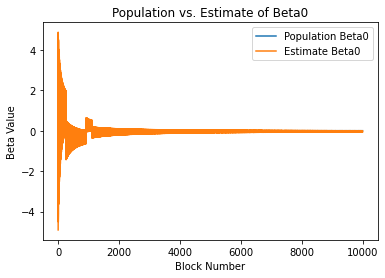

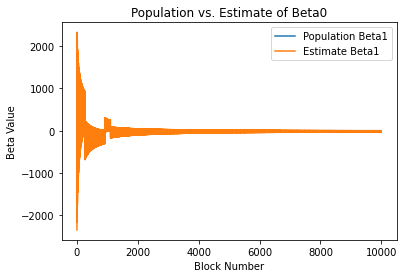

In [2]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [3]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.911311,-2347.897386,0.0,0.001,1
1,4.873892,2330.008890,0.0,0.001,2
2,4.827617,2307.886614,0.0,0.001,3
3,4.791949,2290.835557,0.0,0.001,4
4,-4.511026,-2156.537388,0.0,0.001,5
...,...,...,...,...,...
9995,0.000119,0.056852,0.0,0.001,9996
9996,0.000117,0.055929,0.0,0.001,9997
9997,-0.062010,-29.644384,0.0,0.001,9998
9998,-0.062006,-29.642539,0.0,0.001,9999


## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


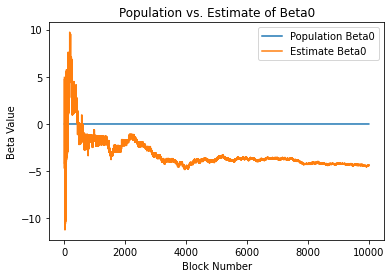

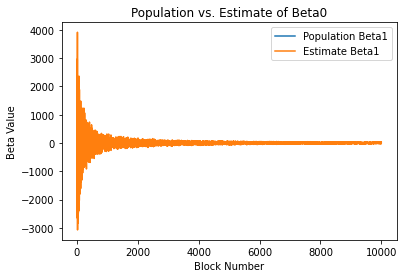

In [4]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [5]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.930800,1943.576749,0.0,0.001,1
1,4.882974,1917.090989,0.0,0.001,2
2,-4.705108,-2648.375178,0.0,0.001,3
3,-4.588278,-2604.177246,0.0,0.001,4
4,4.775457,1961.544538,0.0,0.001,5
...,...,...,...,...,...
9995,-4.335003,29.214160,0.0,0.001,9996
9996,-4.397140,1.086923,0.0,0.001,9997
9997,-4.459268,-29.466719,0.0,0.001,9998
9998,-4.335022,26.281665,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


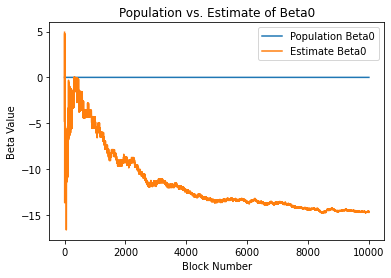

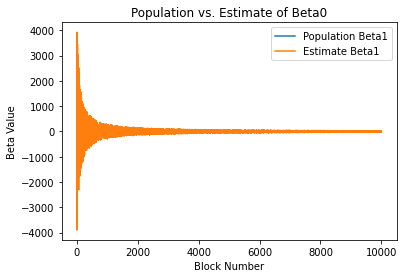

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [7]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.921064,3102.881518,0.0,0.001,1
1,-4.845232,-1131.061416,0.0,0.001,2
2,4.826305,3557.743551,0.0,0.001,3
3,4.790348,3257.929640,0.0,0.001,4
4,4.738265,3925.563626,0.0,0.001,5
...,...,...,...,...,...
9995,-14.592619,16.775203,0.0,0.001,9996
9996,-14.592622,25.849773,0.0,0.001,9997
9997,-14.654749,-5.846619,0.0,0.001,9998
9998,-14.592627,26.807701,0.0,0.001,9999


In [8]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.39343657154346706


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


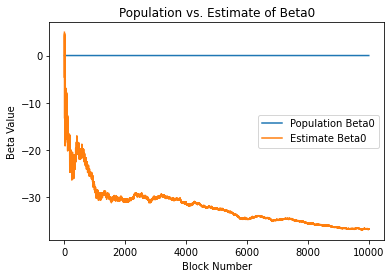

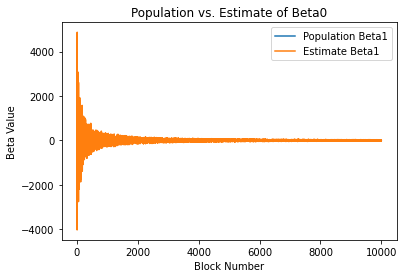

In [9]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [10]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.941004,3146.427876,0.0,0.001,1
1,4.883838,2950.186486,0.0,0.001,2
2,-4.695061,-2442.276163,0.0,0.001,3
3,-4.641200,-2343.102858,0.0,0.001,4
4,-4.545354,-1903.420045,0.0,0.001,5
...,...,...,...,...,...
9995,-36.805864,12.479824,0.0,0.001,9996
9996,-36.867998,-30.259420,0.0,0.001,9997
9997,-36.743743,29.847045,0.0,0.001,9998
9998,-36.805868,12.850258,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


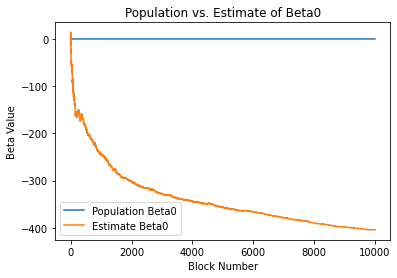

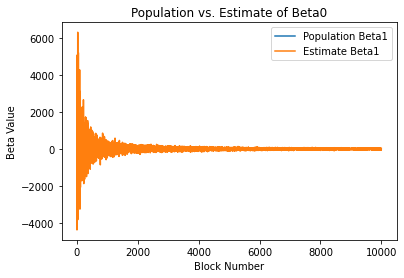

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0           4.892289     3427.558912               0.0             0.001   
1           4.873253     2681.449928               0.0             0.001   
2          -4.733552    -4358.275816               0.0             0.001   
3          14.197818     5067.316210               0.0             0.001   
4          -4.468420    -2113.318564               0.0             0.001   
...              ...             ...               ...               ...   
9995     -404.354103        9.039279               0.0             0.001   
9996     -404.354103        4.649312               0.0             0.001   
9997     -404.354106       -8.169163               0.0             0.001   
9998     -404.229863       14.035379               0.0             0.001   
9999     -404.167752       36.137814               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [11]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)